In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn


In [30]:
X=torch.linspace(1,50,50).reshape(-1,1)

In [31]:
X.shape

torch.Size([50, 1])

In [32]:
torch.manual_seed(71)
e=torch.randint(-8,9,(50,1),dtype=torch.float)

In [33]:
e.shape

torch.Size([50, 1])

In [34]:
y = 2*X+1+e

In [35]:
y


tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])

In [41]:
model=nn.Linear(in_features=1,out_features=1)

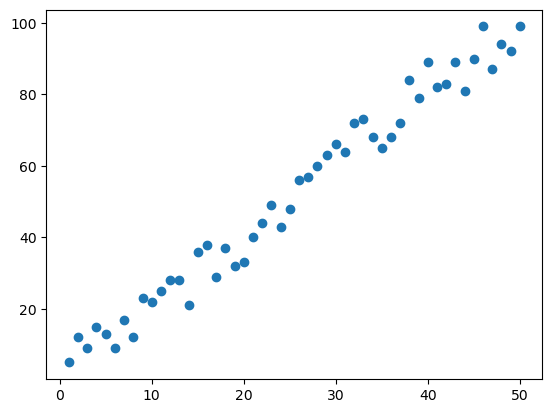

In [42]:
plt.scatter(X.numpy(),y.numpy())

In [43]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear=nn.Linear(in_features,out_features)
        
    def forward(self,x):
        self.linear(x)
        return y_pred
        

In [44]:
for name,param in model.named_parameters():
    print(name,'\t',param.item())

weight 	 -0.5688724517822266
bias 	 -0.03454399108886719


In [45]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)


In [46]:
epochs=50
losses=[]

In [47]:

for i in range(epochs):
    i=i+1
    y_pred=model.forward(X)
    loss=criterion(y_pred,y)
    losses.append(loss)
    print(i,loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

1 5759.10205078125
2 2983.873779296875
3 1551.12353515625
4 811.4435424804688
5 429.57305908203125
6 232.4264678955078
7 130.64578247070312
8 78.09941101074219
9 50.97089767456055
10 36.964725494384766
11 29.73311996459961
12 25.998994827270508
13 24.070514678955078
14 23.074209213256836
15 22.559158325195312
16 22.292566299438477
17 22.15423583984375
18 22.082138061523438
19 22.044218063354492
20 22.02395248413086
21 22.012805938720703
22 22.006359100341797
23 22.002344131469727
24 21.99958038330078
25 21.99747085571289
26 21.99569320678711
27 21.994089126586914
28 21.99258041381836
29 21.99111557006836
30 21.98967933654785
31 21.98825454711914
32 21.986835479736328
33 21.98541831970215
34 21.984006881713867
35 21.982603073120117
36 21.981191635131836
37 21.979787826538086
38 21.978384017944336
39 21.976987838745117
40 21.975584030151367
41 21.974184036254883
42 21.97278594970703
43 21.971391677856445
44 21.969995498657227
45 21.968603134155273
46 21.967208862304688
47 21.965814590454

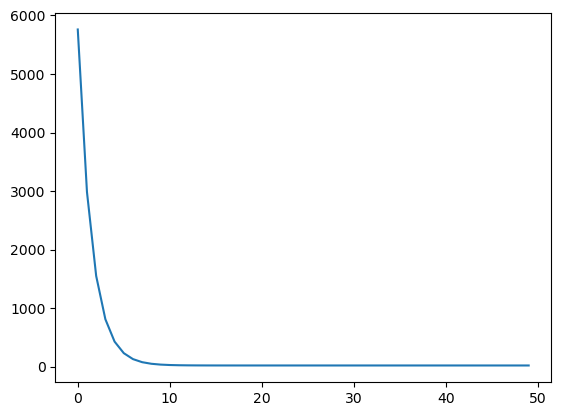

In [56]:
with torch.no_grad():
    plt.plot(range(epochs),losses)


In [62]:
x=np.linspace(1,50,50)
new_weight=model.weight.item()
new_bias=model.bias.item()
y_new=new_weight*x+new_bias

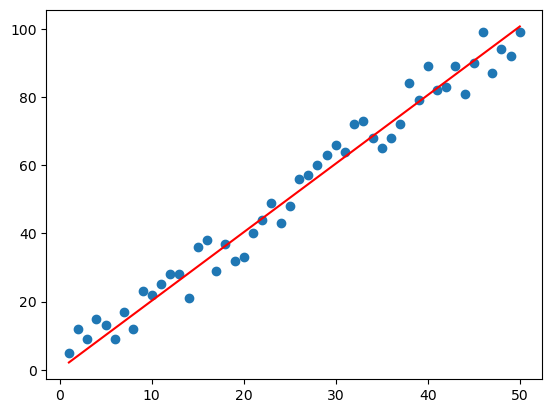

In [63]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,y_new,'r')